In [1]:
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings(action='ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [2]:
DATA_DIR = './data/'

In [3]:
FILE_NAME1 = 'Real_estate_transaction_data1(공공데이터-1273500).csv'
FILE_NAME2 = 'Real_estate_transaction_data2(공공데이터-1273501~).csv'

In [4]:
file1 = pd.read_csv(DATA_DIR + FILE_NAME1)
file2 = pd.read_csv(DATA_DIR + FILE_NAME2)
file = pd.concat([file1,file2])

In [5]:
data_df = file.copy()
data_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
data_df = data_df.reset_index(drop=True)

### 계약일 기준 2014 ~ 2024년 데이터 추출

In [7]:
data_df['DEAL_YEAR'] = data_df['DEAL_YMD'].apply(lambda x:int(str(x)[:4]))

In [8]:
year_list = [year for year in range(2014, 2025)]
data_df = data_df[data_df['DEAL_YEAR'].isin(year_list)]

### 결측치 확인

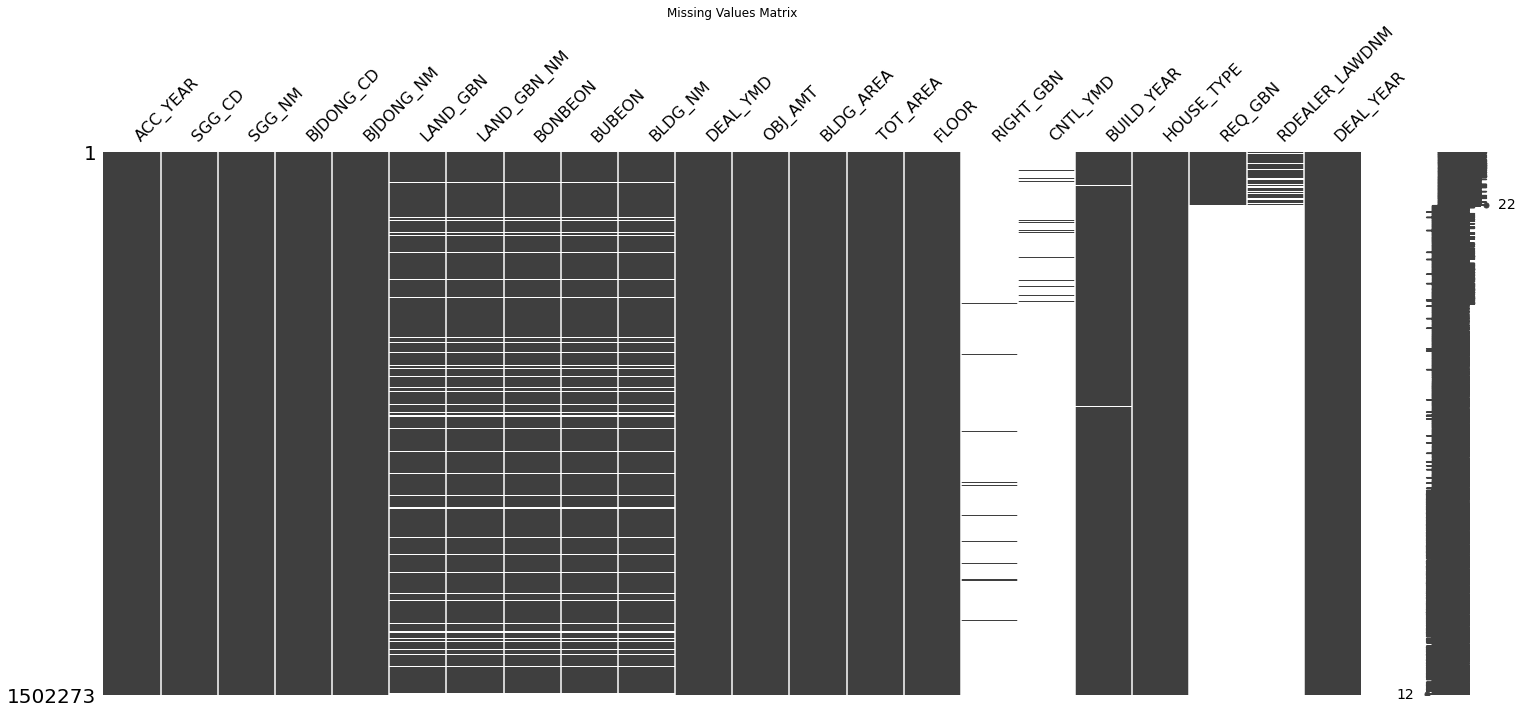

In [9]:
msno.matrix(data_df)
plt.title('Missing Values Matrix')
plt.show()

### 결측치가 많거나 분석에 쓰이지 않을 것으로 보이는 컬럼 삭제

In [10]:
data_df = data_df.drop(['RIGHT_GBN','REQ_GBN','RDEALER_LAWDNM','ACC_YEAR','SGG_CD','BJDONG_CD','LAND_GBN','LAND_GBN_NM','BUILD_YEAR','DEAL_YEAR'],axis=1)

### 취소일이 있는 데이터의 경우 거래가 되지 않았으므로 삭제

In [11]:
data_df = data_df.drop(data_df[~data_df['CNTL_YMD'].isna()].index)
data_df = data_df.reset_index(drop=True)
data_df = data_df.drop(['CNTL_YMD'], axis=1)

### BONBEON과 BUBEON 데이터에서 nan값 또는 숫자가 아닌 경우 nan으로 변경

In [12]:
def BONBEON_BUBEON_preprocessing(value):
    if pd.isnull(value) == False and not(str(value).replace('.','').isdigit()):
        return np.nan
    else:
        return value

In [13]:
data_df['BONBEON_after'] = data_df['BONBEON'].apply(BONBEON_BUBEON_preprocessing)
data_df['BUBEON_after'] = data_df['BUBEON'].apply(BONBEON_BUBEON_preprocessing)

In [17]:
data_df

,SGG_NM,BJDONG_NM,BONBEON,BUBEON,BLDG_NM,DEAL_YMD,OBJ_AMT,BLDG_AREA,TOT_AREA,FLOOR,HOUSE_TYPE,BONBEON_after,BUBEON_after
0,구로구,오류동,6.0,244.0,J팰리스,20240113,18000,29.24,17.63,4.0,연립다세대,6.0,244.0
1,영등포구,양평동2가,43.0,14.0,CO-OP Residence/오목교,20240112,7600,16.98,26.58,9.0,오피스텔,43.0,14.0
2,성북구,정릉동,NaN,NaN,NaN,20240112,55200,37.08,156.00,0.0,단독다가구,NaN,NaN
3,강남구,역삼동,781.0,37.0,781-37,20240112,67000,44.85,25.88,3.0,연립다세대,781.0,37.0
4,은평구,역촌동,80.0,70.0,더라온,20240112,35000,54.37,33.25,4.0,연립다세대,80.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480264,금천구,시흥동,NaN,NaN,NaN,20140101,35900,167.40,113.30,0.0,단독다가구,NaN,NaN
1480265,은평구,진관동,88.0,0.0,은평뉴타운 우물골(두산위브8단지),20140101,65500,134.43,0.00,10.0,아파트,88.0,0.0
1480266,은평구,진관동,102.0,0.0,은평뉴타운 박석고개(힐스테이트1단지),20140101,44700,84.72,0.00,12.0,아파트,102.0,0.0
1480267,은평구,진관동,11.0,0.0,은평뉴타운상림마을(현대아이파크B-13),20140101,59900,134.91,0.00,9.0,아파트,11.0,0.0


### 건물명 전처리

In [29]:
data_df['BLDG_NM'] = data_df['BLDG_NM'].str.replace(r'\([^)]*\)', '')
data_df['BLDG_NM'] = data_df['BLDG_NM'].str.replace('(', '')
data_df['BLDG_NM'] = data_df['BLDG_NM'].replace('',np.NaN)

In [30]:
def BLDG_NM_preprocessing(building_name):
    building_name = str(building_name)
    if '/' in building_name:
        return building_name.split('/')[0]
    elif '-' in building_name:
        name_list = building_name.split('/')
        if len(name_list)==2 and str(name_list[0]).isdigit() and str(name_lsit[1]).isdigit():
            return np.nan
    else:
        return building_name

In [31]:
data_df['BLDG_NM'] = data_df['BLDG_NM'].apply(BLDG_NM_preprocessing)
data_df = data_df.replace({None: np.nan,'nan':np.nan})

In [33]:
data_df.to_csv('./data/API_data.csv',index_label='ID')